In [63]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [64]:
!unzip dataset.zip?dl=0

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import load_img, img_to_array
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

#  Building our Model To train the data 

In [66]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

In [67]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )

# Preparing our data using data generator

In [68]:
train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)
train_data = train_datagen.flow_from_directory(directory= "C:\\Users\\admin\\Desktop\\Final Project\\Emotion-detection-main\\train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices


Found 28709 images belonging to 7 classes.


{'Angry': 0,
 'Disgust': 1,
 'Fear': 2,
 'Happy': 3,
 'Neutral': 4,
 'Sad': 5,
 'Surprise': 6}

In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img, img_to_array


# Create generator for validation (just rescaling, no augmentation)
val_datagen = ImageDataGenerator(rescale=1./255)

val_data = val_datagen.flow_from_directory(
    directory=r"C:\\Users\\admin\Desktop\\Final Project\\Emotion-detection-main\\train", 
    target_size=(224,224), 
    batch_size=32,
    class_mode="categorical"
)


Found 28709 images belonging to 7 classes.


# visualizaing the data that is fed to train data gen

In [ ]:
import matplotlib.pyplot as plt

# to visualize the images in the traing data denerator 

t_img, label = next(train_data)


#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

# having early stopping and model check point

In [ ]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 5, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [ ]:
hist = model.fit(train_data, 
                 steps_per_epoch=10, 
                 epochs=30, 
                 validation_data=val_data, 
                 validation_steps=8, 
                 callbacks=[es, mc])


c:\Users\admin\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1902 - loss: 21.8002
Epoch 1: val_accuracy improved from None to 0.28516, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 67s 7s/step - accuracy: 0.2125 - loss: 23.9420 - val_accuracy: 0.2852 - val_loss: 17.2428
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2684 - loss: 17.2494
Epoch 2: val_accuracy did not improve from 0.28516
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.2719 - loss: 13.1051 - val_accuracy: 0.2578 - val_loss: 8.9304
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2869 - loss: 9.2353
Epoch 3: val_accuracy improved from 0.28516 to 0.30078, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.3031 - loss: 8.6377 - val_accuracy: 0.3008 - val_loss: 9.7190
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3751 - loss: 7.9562
Epoch 4: val_accuracy improved from 0.30078 to 0.38281, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.3875 - loss: 7.3900 - val_accuracy: 0.3828 - val_loss: 5.7487
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3806 - loss: 6.4204
Epoch 5: val_accuracy improved from 0.38281 to 0.41016, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4000 - loss: 5.3616 - val_accuracy: 0.4102 - val_loss: 5.1828
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4588 - loss: 4.7091
Epoch 6: val_accuracy did not improve from 0.41016
10/10 ━━━━━━━━━━━━━━━━━━━━ 63s 7s/step - accuracy: 0.4469 - loss: 4.7046 - val_accuracy: 0.3555 - val_loss: 4.9715
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3760 - loss: 5.4857
Epoch 7: val_accuracy improved from 0.41016 to 0.41406, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 64s 7s/step - accuracy: 0.4156 - loss: 5.1900 - val_accuracy: 0.4141 - val_loss: 4.5853
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3658 - loss: 5.3441
Epoch 8: val_accuracy improved from 0.41406 to 0.44141, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 56s 6s/step - accuracy: 0.4094 - loss: 4.8784 - val_accuracy: 0.4414 - val_loss: 5.6739
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4075 - loss: 5.2599
Epoch 9: val_accuracy did not improve from 0.44141
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4187 - loss: 5.0234 - val_accuracy: 0.4141 - val_loss: 4.8603
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4328 - loss: 4.9257
Epoch 10: val_accuracy did not improve from 0.44141
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4219 - loss: 4.9164 - val_accuracy: 0.3164 - val_loss: 5.8548
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3849 - loss: 6.4239
Epoch 11: val_accuracy did not improve from 0.44141
10/10 ━━━━━━━━━━━━━━━━━━━━ 59s 6s/step - accuracy: 0.4094 - loss: 5.9430 - val_accuracy: 0.4141 - val_loss: 5.1500
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4083 - loss: 5.6759
Epoch 12: val_accuracy did not improve from 0.4414

10/10 ━━━━━━━━━━━━━━━━━━━━ 57s 6s/step - accuracy: 0.3719 - loss: 6.6460 - val_accuracy: 0.4805 - val_loss: 4.9974
Epoch 14/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4356 - loss: 5.6620
Epoch 14: val_accuracy did not improve from 0.48047
10/10 ━━━━━━━━━━━━━━━━━━━━ 58s 6s/step - accuracy: 0.4219 - loss: 6.3034 - val_accuracy: 0.4180 - val_loss: 5.4229
Epoch 15/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3433 - loss: 6.3399
Epoch 15: val_accuracy improved from 0.48047 to 0.48828, saving model to best_model.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 60s 6s/step - accuracy: 0.3812 - loss: 6.6748 - val_accuracy: 0.4883 - val_loss: 6.5549
Epoch 16/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.3779 - loss: 6.6385
Epoch 16: val_accuracy did not improve from 0.48828
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.3906 - loss: 6.3570 - val_accuracy: 0.4297 - val_loss: 6.1151
Epoch 17/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5052 - loss: 4.3056
Epoch 17: val_accuracy did not improve from 0.48828
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.4938 - loss: 4.6421 - val_accuracy: 0.4414 - val_loss: 5.8265
Epoch 18/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.4519 - loss: 6.2218
Epoch 18: val_accuracy did not improve from 0.48828
10/10 ━━━━━━━━━━━━━━━━━━━━ 61s 6s/step - accuracy: 0.4313 - loss: 6.4514 - val_accuracy: 0.4727 - val_loss: 5.4625
Epoch 18: early stopping


In [ ]:

# Loading the best fit model 
from keras.models import load_model
model = load_model("C:\\Users\\admin\Desktop\\Final Project\\Emotion-detection-main\\best_model.h5")

In [ ]:
h =  hist.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

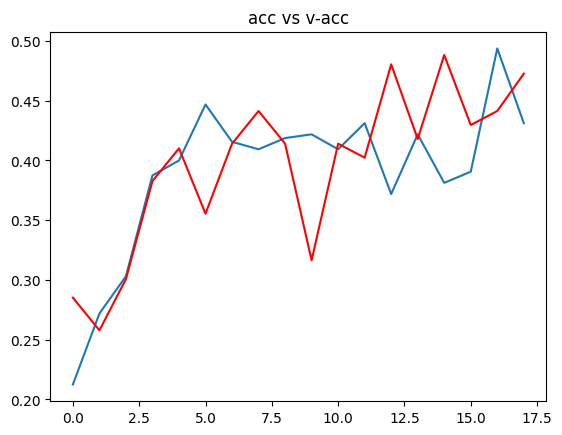

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

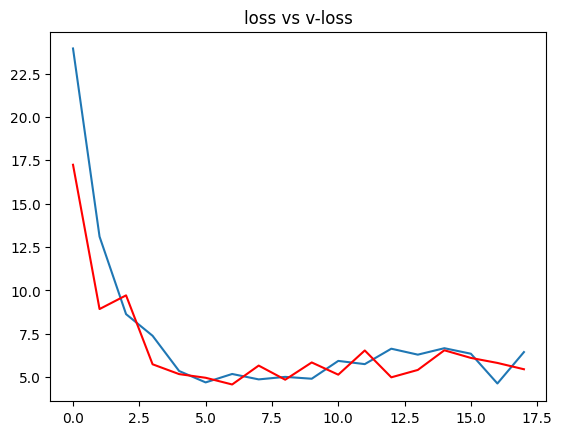

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 613ms/step
 the image is of Angry


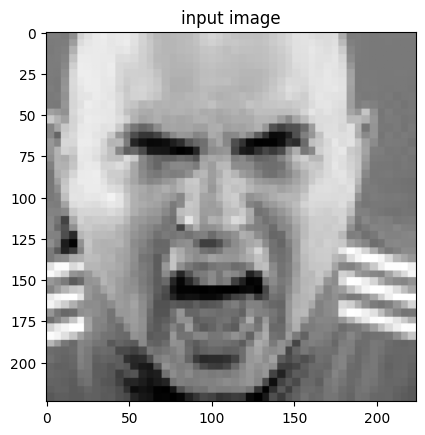

In [ ]:
import numpy as np
# path for the image to see if it predics correct class

path = r"C:\\Users\\admin\\Desktop\\Final Project\\Emotion-detection-main\\train\Angry\\3.jpg"

img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()